# Lead Scoring Case Study
###### *-Prepared By : Abhijit Ganguly*


__Problem Statement :__
* An education company named X Education sells online courses to industry professionals. 

* On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

* There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

* X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

__Our Goals of the Case Study:__

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- To **adjust to the company's requirement changes** in the future so these need to be handled as well.

__The steps taken are :__
1. Importing packages and Reading Data
2. Inspecting the Dataframe
3. Data Preparation & EDA
4. Test-Train Split
5. Feature Scaling
6. Model Building 
7. Feature Selection Using RFE
8. Calculating Other Metrics beyond Accuracy
9. Plotting the ROC (Receiver Operator Characteristic) Curve
10.Finding Optimal Cutoff Point
11.Precision and Recall
12.Making predictions on Test set
13.Calculating Lead score for the Entire dataset
14.Determining Relative Importance of Model Variables

## Step 1: Importing packages and Reading Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Importing Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To Scale our data


In [2]:
#Reading Dataset
leads = pd.read_csv("Leads.csv",  sep = ',')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Data Preparation & EDA

### Handling Duplicate Rows

In [6]:
# Removing Duplicate Rows
leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)

### Handling Null Values

In [7]:
# Checking for total count and percentage of null values in all dataframe columns.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


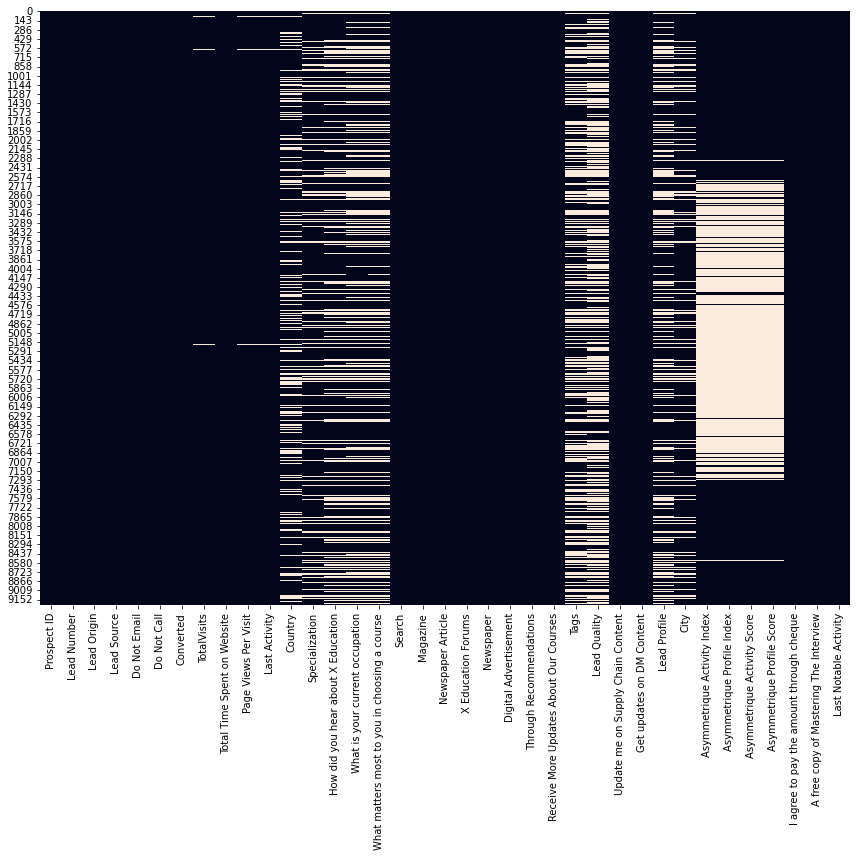

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

### Dropping Unnecessary Columns NOT needed for Analysis

In [9]:
# Identifying if any column exists with only Null values
leads.isnull().all(axis=0).any()

False

In [10]:
# Dropping all columns with only 0 values
leads.loc[:, (leads != 0).any(axis=0)]
leads.shape

(9240, 37)

In [11]:
#Remove columns which has only one unique value

"""
Deleting following columns as they have only one unique value and hence cannot be used in predicting a successful lead case

Receive More Updates About Our Courses
I agree to pay the amount through cheque
Update me on Supply Chain Content
Magazine

"""   
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [12]:
# Deleting column 'Prospect ID' as it will not have any effect in prediction model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 31)

In [13]:
# Deleting columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 29)

In [14]:
# Deleting column 'What matters most to you in choosing a course' as it mostly has unique and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [15]:
# Deleting column 'How did you hear about X Education' as it mostly has null or 'Select' values that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

### Removing rows where a particular column has high missing values

In [16]:
leads['Lead Source'].isnull().sum()

36

In [17]:
# Removing rows where a particular column has high missing values because the column is important and cannot be removed
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 27)

### Imputing continuous variables ('Total Visits' & 'Page Views Per Visit') having outliers with Median values

In [18]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [19]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

### Imputing variable 'Country' with Mode values

In [20]:
leads['Country'].mode()

0    India
Name: Country, dtype: object

In [21]:
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'

In [22]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

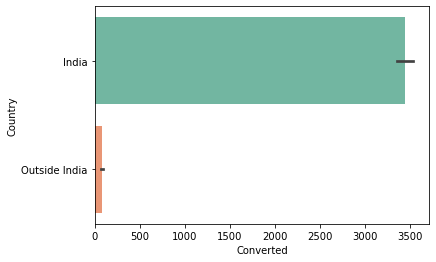

In [23]:
sns.barplot(y='Country', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

### Assigning A Unique Category to NULL/SELECT values in 'Lead Quality'

#### Instead of deleting columns with high null value percentage (resulting in loss of data), adding a unique category adds more information into the dataset and results in the change of variance.

#### `'Select' values in some columns` : 

##### There are some columns in dataset which have a level/value called 'Select'. This might have happened because these fields in the website might have been non-mandatory fields with drop downs options for customers to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't mandatory fields, many customers might have have chosen to leave them at default selection.

In [24]:
leads['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [25]:
leads['Lead Quality'].isnull().sum()

4753

In [26]:
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

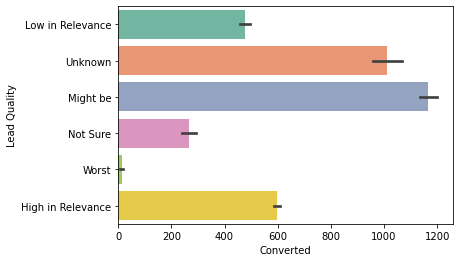

In [27]:
sns.barplot(y='Lead Quality', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Asymmetrique Profile Index`

In [28]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [29]:
leads['Asymmetrique Profile Index'].isnull().sum()

4201

In [30]:
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

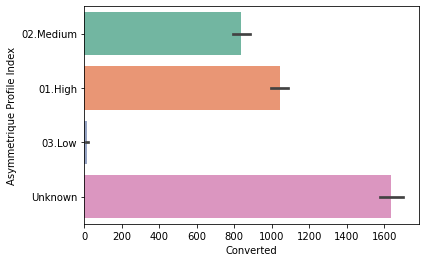

In [31]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Asymmetrique Activity Index`

In [32]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [33]:
leads['Asymmetrique Activity Index'].isnull().sum()

4201

In [34]:
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

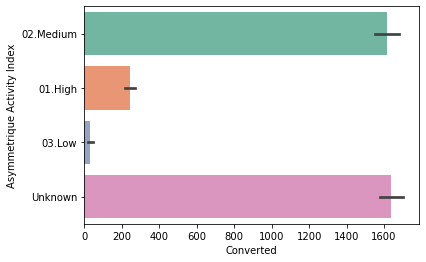

In [35]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Last Activity`

In [36]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
leads['Last Activity'].isnull().sum()

101

In [38]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

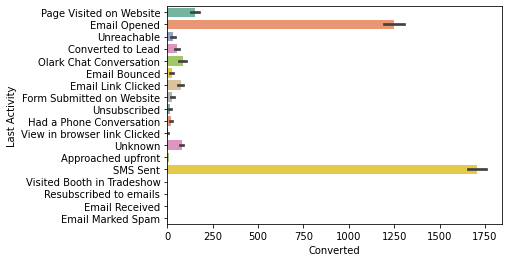

In [39]:
sns.barplot(y='Last Activity', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Lead Profile`

In [40]:
leads['Lead Profile'].value_counts()

Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [41]:
leads['Lead Profile'].isnull().sum()

2709

In [42]:
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [43]:
leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

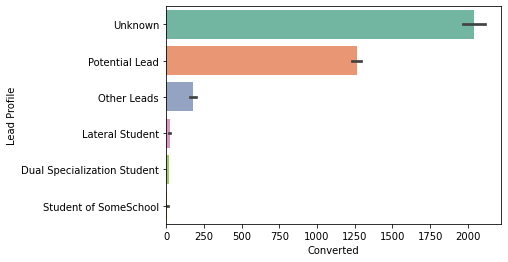

In [44]:
sns.barplot(y='Lead Profile', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `City`

In [45]:
leads['City'].isnull().sum()

1420

In [46]:
leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()

Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [47]:
leads['City'].replace('Select', 'Unknown', inplace =True)
leads['City'].value_counts()

Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

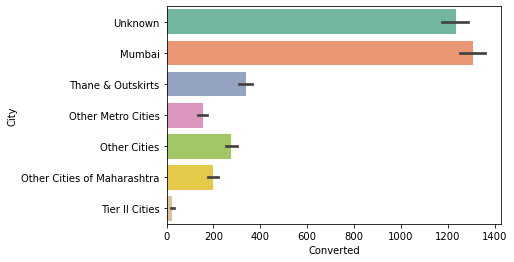

In [48]:
sns.barplot(y='City', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for field `What is your current occupation`

In [49]:
leads['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
leads['What is your current occupation'].isnull().sum()

2690

In [51]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

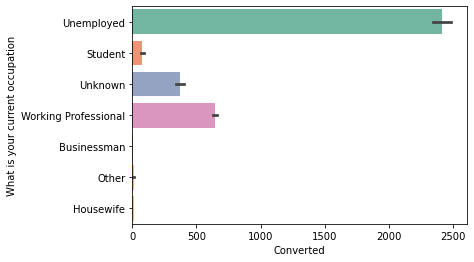

In [52]:
sns.barplot(y='What is your current occupation', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Tags`

In [53]:
leads['Tags'].value_counts()

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [54]:
leads['Tags'].isnull().sum()

3342

In [55]:
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

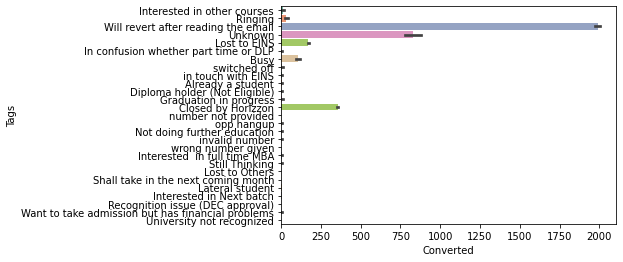

In [56]:
sns.barplot(y='Tags', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

#### Creating a new category consisting of NULL/Select values for the field `Specialization`

In [57]:
leads['Specialization'].value_counts()

Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [58]:
leads['Specialization'].isnull().sum()

1438

In [59]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

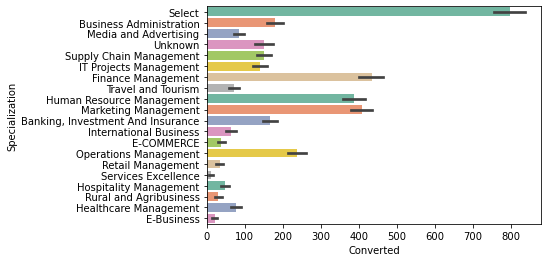

In [60]:
sns.barplot(y='Specialization', x='Converted', palette='Set2', data=leads, estimator=np.sum)
plt.show()

## Reinspection of Null Values Post Changes Made

In [61]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Lead Number,0,0.0
Newspaper Article,0,0.0
A free copy of Mastering The Interview,0,0.0
Asymmetrique Profile Index,0,0.0
Asymmetrique Activity Index,0,0.0


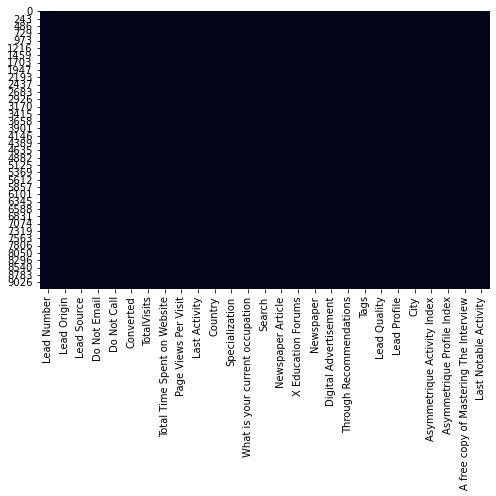

In [62]:
plt.figure(figsize=(7,7))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

### Checking for Outliers

In [63]:
# Checking outliers at Percentiles - 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


In [64]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [65]:
#Function to plot the distribution plot of numeric variables
def boxplot(var_list):
    plt.figure(figsize=(12,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='flare', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

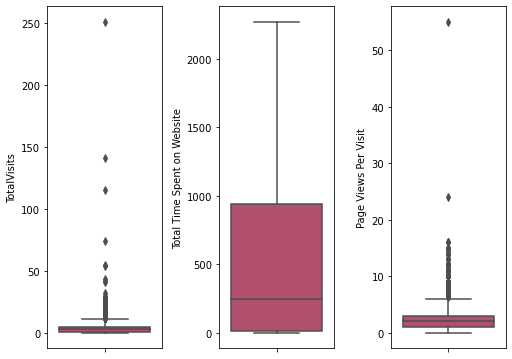

In [66]:
boxplot(num_vars)

***Checking data distribution between variables 'TotalVisits' & 'Total Time Spent on Website'***

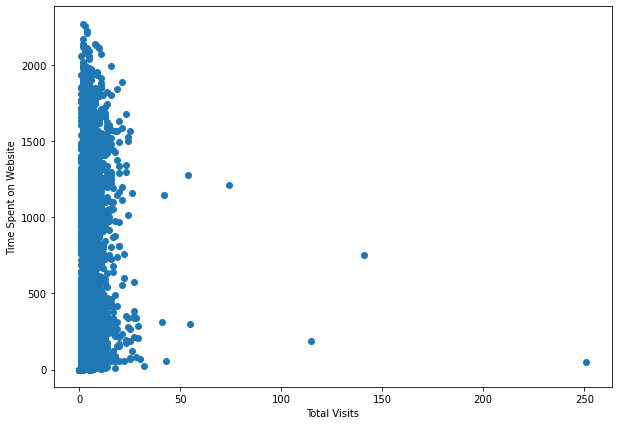

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(leads['TotalVisits'], leads['Total Time Spent on Website'])
ax.set_xlabel('Total Visits')
ax.set_ylabel('Time Spent on Website')
plt.show()

***Checking data distribution between variables 'Page Views Per Visit' & 'Total Time Spent on Website'***

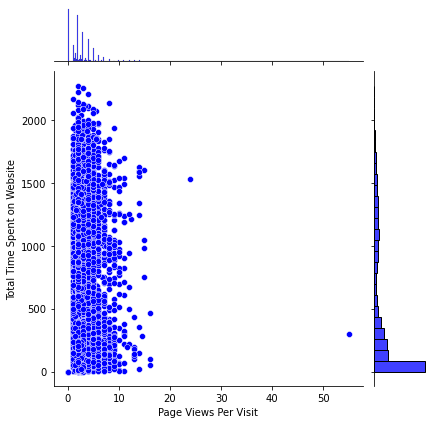

In [68]:
sns.jointplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'], color="b")
plt.show()

### Removing outlier values based on the Interquartile distance for the continuous variable

In [69]:
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8575, 27)

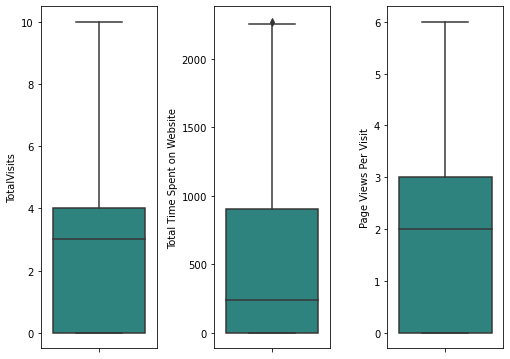

In [70]:
#Function to plot the distribution plot of numeric variables
def boxplot(var_list):
    plt.figure(figsize=(12,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='viridis', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

boxplot(num_vars)

In [71]:
leads.shape

(8575, 27)

### Converting binary variables (Yes/No) to 0/1

In [72]:
# Creating list of variables for Mapping to 0/1

vars_list =  ['X Education Forums','Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'Newspaper', 
            'Digital Advertisement','A free copy of Mastering The Interview','Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[vars_list] = leads[vars_list].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


### Creating dummy features (one-hot encoded) for categorical variables with multiple levels

In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_1 = pd.get_dummies(leads[['Country','Lead Origin','Lead Source','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy_1], axis=1)
leads.shape

(8575, 66)

In [74]:
# Creating dummy variables for remaining categorical variables and dropping the level called 'Unknown' which represents Null/SELECT values.

# Creating dummy variables for variable 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Tags'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents Null/SELECT values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents Null/SELECT values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents Null/SELECT values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents Null/SELECT values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
leads.shape

(8575, 156)

In [75]:
### Dropping Repeated Variables

In [76]:
# As we have created dummies for the below variables, so below variables can be dropped
leads = leads.drop(['Lead Quality','Lead Origin','Lead Profile','Lead Source','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','What is your current occupation', 'Specialization','Country','City','Last Activity',  
                    'Last Notable Activity'], 1)
leads.shape

(8575, 143)

In [77]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Ensuring there are NO categorical columns are left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [79]:
# Creating a copy of the origial dataframe in case of any requirement later
original_leads_df = leads.copy()
print(original_leads_df.shape)
print(leads.shape)

(8575, 143)
(8575, 143)


### Step 4: Test-Train Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Putting feature variables to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [86]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.0,0.0,0.000167,0.000333,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the Lead Conversion Rate

In [88]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.04081632653061

The lead conversion rate is almost 38%

### Step 6: Model Building

#### Running our First Training Model

In [89]:
import statsmodels.api as sm

In [90]:
# Logistic regression model (first run including all variables in the dataset)
log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5871
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 26 Feb 2023   Deviance:                       43657.
Time:                        08:44:35   Pearson chi2:                 2.13e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -3.923e+15   1.08e+08  -3.62e+07      0.000   -3.92e+15   -3.92e+15
Do Not Email                                           -2.666e+14   4.66e+06  -5.72e+07      0.000   -2.67e+14   -2.67e+14
Do Not Call                                              -37.9370   1.74e-06  -2.18e+07      0.000     -37.937     -37.937
TotalVisits                                             2.663e+13   1.51e+06   1.76e+07      0.000    2.66e+13    2.66e+13
Total Time Spent on Website                              1.68e+14   1.07e+06   1.57e+08      0.000    1.68e+14    1.68e+14
Page Views Per Visit                                   -4.024e+13   1.64e+06  -2.46e+07      0.000   -4.02e+13   -4.02e+13
Search                                                  6.514e+14    2.9e+07   2.24e+07      0.000    6.51e+14    6.51e+14
Newspaper Article                                         25.7348   8.14e-07   3.16e+07      0.000      25.735      25.735
X Education Forums                                        -6.4760   1.37e-06  -4.71e+06      0.000      -6.476      -6.476
Newspaper                                              -4.002e+15   6.76e+07  -5.92e+07      0.000      -4e+15      -4e+15
Digital Advertisement                                   2.948e+14   4.85e+07   6.07e+06      0.000    2.95e+14    2.95e+14
Through Recommendations                                 1.473e+13      5e+07   2.95e+05      0.000    1.47e+13    1.47e+13
A free copy of Mastering The Interview                 -2.217e+13   2.94e+06  -7.55e+06      0.000   -2.22e+13   -2.22e+13
Country_Outside India                                  -3.356e+13   4.99e+06  -6.73e+06      0.000   -3.36e+13   -3.36e+13
Lead Origin_Landing Page Submission                    -1.194e+14   4.28e+06  -2.79e+07      0.000   -1.19e+14   -1.19e+14
Lead Origin_Lead Add Form                               3.367e+15   6.77e+07   4.97e+07      0.000    3.37e+15    3.37e+15
Lead Origin_Lead Import                                 1.627e+15   4.01e+07   4.05e+07      0.000    1.63e+15    1.63e+15
Lead Source_Direct Traffic                              3.458e+15   7.95e+07   4.35e+07      0.000    3.46e+15    3.46e+15
Lead Source_Facebook                                    1.627e+15   4.01e+07   4.05e+07      0.000    1.63e+15    1.63e+15
Lead Source_Google                                      3.435e+15   7.95e+07   4.32e+07      0.000    3.44e+15    3.44e+15
Lead Source_Live Chat                                   2.626e+15   6.31e+07   4.16e+07      0.000    2.63e+15    2.63e+15
Lead Source_NC_EDM                                      7.561e+15   1.04e+08   7.26e+07      0.000    7.56e+15    7.56e+15
Lead Sou

## Step 7: Feature Selection Using RFE

As there are is a long list of variables present in the dataset which is difficult to deal with. We approach this by selecting a smaller set of features from this pool of variables using RFE.

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE

In [93]:
# Selecting 20 variables using RFE
rfe = RFE(logreg,n_features_to_select=20)   # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [94]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('Do Not Call', False, 121),
 ('TotalVisits', False, 73),
 ('Total Time Spent on Website', False, 12),
 ('Page Views Per Visit', False, 55),
 ('Search', False, 24),
 ('Newspaper Article', False, 116),
 ('X Education Forums', False, 115),
 ('Newspaper', False, 91),
 ('Digital Advertisement', False, 89),
 ('Through Recommendations', False, 102),
 ('A free copy of Mastering The Interview', False, 90),
 ('Country_Outside India', False, 78),
 ('Lead Origin_Landing Page Submission', False, 72),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 53),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 94),
 ('Lead Source_Live Chat', False, 110),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 70),
 ('Lead Source_Pay per Click Ads', False, 111),
 ('Lead Source_Press_Release', False, 122),
 ('Lead Source_Referen

In [96]:
# Putting all columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [97]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=121)

#### Assessing the model with StatsModels (using the columns chosen from running RFE)

In [98]:
X_train_sm = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.7
Date:                Sun, 26 Feb 2023   Deviance:                       2529.4
Time:                        08:44:41   Pearson chi2:                 8.56e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4929      0.090    -27.836      0.000      -2.668      -2.317
Lead Source_Welingak Website                             3.2281      0.731      4.414      0.000       1.795       4.662
Lead Quality_Worst                                      -2.5504      0.761     -3.354      0.001      -4.041      -1.060
Asymmetrique Activity Index_03.Low                      -2.4592      0.358     -6.869      0.000      -3.161      -1.758
Tags_Already a student                                  -3.8785      0.726     -5.344      0.000      -5.301      -2.456
Tags_Closed by Horizzon                                  5.1421      0.722      7.120      0.000       3.727       6.558
Tags_Diploma holder (Not Eligible)                     -24.1871   2.82e+04     -0.001      0.999   -5.52e+04    5.52e+04
Tags_Interested  in full time MBA                       -3.0545      0.742     -4.117      0.000      -4.509      -1.600
Tags_Interested in other courses                        -3.0288      0.330     -9.183      0.000      -3.675      -2.382
Tags_Lost to EINS                                        6.3792      0.831      7.677      0.000       4.751       8.008
Tags_Not doing further education                        -3.7904      1.032     -3.674      0.000      -5.813      -1.768
Tags_Ringing                                            -4.2659      0.249    -17.107      0.000      -4.755      -3.777
Tags_Will revert after reading the email                 3.5963      0.194     18.561      0.000       3.217       3.976
Tags_invalid number                                    -25.7192    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_number not provided                               -25.9733    4.5e+04     -0.001      1.000   -8.82e+04    8.82e+04
Tags_opp hangup                                         -3.5152      1.063     -3.308      0.001      -5.598      -1.433
Tags_switched off                                       -5.1620      0.724     -7.126      0.000      -6.582      -3.742
Tags_wrong number given                                -26.1206   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
What is your current occupation_Unemployed               2.0649      0.119     17.357      0.000       1.832       2.298
What is your current occupation_Working Professional     2.1458      0.364      5.903      0.000       1.433       2.858
Last Activity_SMS Sent                                   2.0390      0.112     18.174      0.000       1.819       2.259
========================================================================================================================
"""

In [99]:
# Calculating the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.065692
7331    0.009069
7688    0.833555
92      0.076360
4908    0.076360
451     0.009069
4945    0.009069
2844    0.994975
4355    0.076360
7251    0.001051
dtype: float64

In [100]:
# Reshaping the Numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06569164, 0.00906869, 0.83355546, 0.07635965, 0.07635965,
       0.00906869, 0.00906869, 0.99497496, 0.07635965, 0.00105118])

##### Creating a dataframe with the actual churn flag and predicted probabilities

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.065692,8529
1,0,0.009069,7331
2,1,0.833555,7688
3,0,0.076360,92
4,0,0.076360,4908


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [102]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.065692,8529,0
1,0,0.009069,7331,0
2,1,0.833555,7688,1
3,0,0.076360,92,0
4,0,0.076360,4908,0


In [103]:
#Importing 'Metrics' from skLearn
from sklearn import metrics

#### Creating Confusion Matrix

In [104]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion_mat)

[[3647   89]
 [ 409 1857]]


In [105]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [106]:
# Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9170276574475175


#### Checking VIFs

In [107]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.30
9,Tags_Not doing further education,1.27
15,Tags_switched off,1.20
5,Tags_Diploma holder (Not Eligible),1.12
6,Tags_Interested in full time MBA,1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
16,Tags_wrong number given,1.04


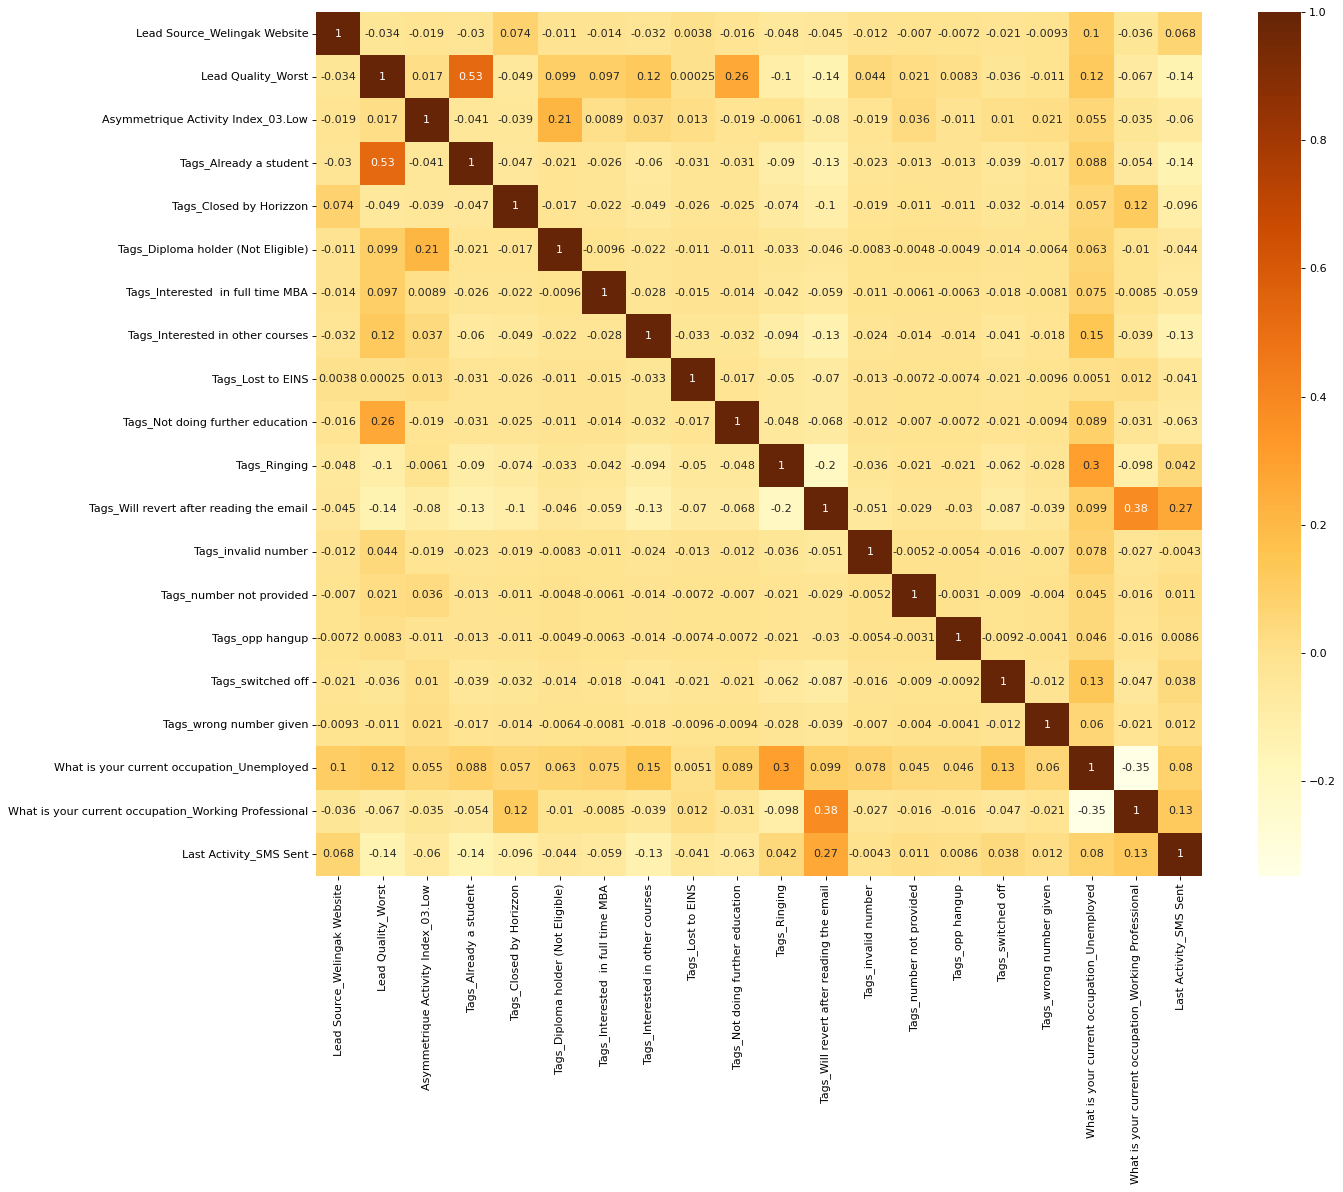

In [109]:
plt.figure(figsize=(18,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlOrBr")

plt.tight_layout()
plt.show()

### Dropping Variable and Updating the Model

As can be noticed some of the variables were found to have high p-values. Such variables are insignificant and should be dropped.

In [110]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5982
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.7
Date:                Sun, 26 Feb 2023   Deviance:                       2557.4
Time:                        08:44:43   Pearson chi2:                 8.49e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4804      0.089    -27.881      0.000      -2.655      -2.306
Lead Source_Welingak Website                             3.2918      0.731      4.503      0.000       1.859       4.725
Lead Quality_Worst                                      -2.7112      0.739     -3.668      0.000      -4.160      -1.263
Asymmetrique Activity Index_03.Low                      -2.4342      0.357     -6.817      0.000      -3.134      -1.734
Tags_Already a student                                  -3.8015      0.724     -5.247      0.000      -5.221      -2.382
Tags_Closed by Horizzon                                  5.1851      0.722      7.184      0.000       3.770       6.600
Tags_Diploma holder (Not Eligible)                     -24.1120   2.81e+04     -0.001      0.999   -5.51e+04    5.51e+04
Tags_Interested  in full time MBA                       -2.9855      0.741     -4.028      0.000      -4.438      -1.533
Tags_Interested in other courses                        -2.9603      0.329     -8.996      0.000      -3.605      -2.315
Tags_Lost to EINS                                        6.4382      0.838      7.684      0.000       4.796       8.080
Tags_Not doing further education                        -3.7070      1.031     -3.596      0.000      -5.727      -1.687
Tags_Ringing                                            -4.1829      0.248    -16.855      0.000      -4.669      -3.696
Tags_Will revert after reading the email                 3.6368      0.193     18.834      0.000       3.258       4.015
Tags_invalid number                                    -25.6348    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_opp hangup                                         -3.4305      1.062     -3.231      0.001      -5.512      -1.349
Tags_switched off                                       -5.0770      0.724     -7.013      0.000      -6.496      -3.658
Tags_wrong number given                                -26.0375   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
What is your current occupation_Unemployed               1.9949      0.118     16.969      0.000       1.764       2.225
What is your current occupation_Working Professional     2.1030      0.363      5.788      0.000       1.391       2.815
Last Activity_SMS Sent                                   2.0063      0.111     18.069      0.000       1.789       2.224
========================================================================================================================
"""

In [112]:
# Calculating predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.065249
7331    0.009300
7688    0.820658
92      0.077242
4908    0.077242
451     0.009300
4945    0.009300
2844    0.994861
4355    0.077242
7251    0.000913
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.52492255e-02, 9.29987842e-03, 8.20658174e-01, 7.72422324e-02,
       7.72422324e-02, 9.29987842e-03, 9.29987842e-03, 9.94861183e-01,
       7.72422324e-02, 9.12704851e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.065249,8529
1,0,0.009300,7331
2,1,0.820658,7688
3,0,0.077242,92
4,0,0.077242,4908


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.065249,8529,0
1,0,0.009300,7331,0
2,1,0.820658,7688,1
3,0,0.077242,92,0
4,0,0.077242,4908,0


In [116]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3641   95]
 [ 409 1857]]


In [117]:
# Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9160279906697767


In [118]:
# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.29
9,Tags_Not doing further education,1.27
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.12
5,Tags_Diploma holder (Not Eligible),1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
15,Tags_wrong number given,1.04


In [119]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5983
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1305.1
Date:                Sun, 26 Feb 2023   Deviance:                       2610.1
Time:                        08:44:43   Pearson chi2:                 8.25e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5897
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4653      0.088    -27.969      0.000      -2.638      -2.293
Lead Source_Welingak Website                             3.4161      0.731      4.676      0.000       1.984       4.848
Lead Quality_Worst                                      -2.7568      0.728     -3.787      0.000      -4.184      -1.330
Asymmetrique Activity Index_03.Low                      -2.3688      0.357     -6.637      0.000      -3.068      -1.669
Tags_Already a student                                  -3.6760      0.724     -5.080      0.000      -5.094      -2.258
Tags_Closed by Horizzon                                  5.2742      0.721      7.314      0.000       3.861       6.687
Tags_Diploma holder (Not Eligible)                     -22.9881   1.71e+04     -0.001      0.999   -3.35e+04    3.35e+04
Tags_Interested  in full time MBA                       -2.8602      0.740     -3.866      0.000      -4.310      -1.410
Tags_Interested in other courses                        -2.8332      0.328     -8.641      0.000      -3.476      -2.191
Tags_Lost to EINS                                        6.4558      0.839      7.692      0.000       4.811       8.101
Tags_Not doing further education                        -3.5698      1.030     -3.467      0.001      -5.588      -1.552
Tags_Ringing                                            -4.0320      0.246    -16.378      0.000      -4.515      -3.550
Tags_Will revert after reading the email                 3.7184      0.192     19.386      0.000       3.342       4.094
Tags_invalid number                                    -24.4886   1.64e+04     -0.001      0.999   -3.22e+04    3.21e+04
Tags_opp hangup                                         -3.2794      1.061     -3.092      0.002      -5.358      -1.201
Tags_switched off                                       -4.9237      0.723     -6.809      0.000      -6.341      -3.506
What is your current occupation_Unemployed               1.8623      0.115     16.189      0.000       1.637       2.088
What is your current occupation_Working Professional     2.0226      0.363      5.570      0.000       1.311       2.734
Last Activity_SMS Sent                                   1.9628      0.109     17.982      0.000       1.749       2.177
========================================================================================================================
"""

In [121]:
# Calculating the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064635
7331    0.009613
7688    0.795734
92      0.078329
4908    0.078329
451     0.009613
4945    0.009613
2844    0.994720
4355    0.078329
7251    0.000879
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.46349739e-02, 9.61261677e-03, 7.95733870e-01, 7.83285731e-02,
       7.83285731e-02, 9.61261677e-03, 9.61261677e-03, 9.94720023e-01,
       7.83285731e-02, 8.79091579e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064635,8529
1,0,0.009613,7331
2,1,0.795734,7688
3,0,0.078329,92
4,0,0.078329,4908


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064635,8529,0
1,0,0.009613,7331,0
2,1,0.795734,7688,1
3,0,0.078329,92,0
4,0,0.078329,4908,0


In [125]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3630  106]
 [ 409 1857]]


In [126]:
# Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9141952682439187


#### Checking VIFs

In [127]:
# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.29
9,Tags_Not doing further education,1.26
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.12
5,Tags_Diploma holder (Not Eligible),1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.06
13,Tags_opp hangup,1.02


### Dropping the Next Variable and Updating the Model

Dropping another variable basis high p-values noticed.

In [128]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [129]:
X_train_sm = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5984
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1313.2
Date:                Sun, 26 Feb 2023   Deviance:                       2626.4
Time:                        08:44:43   Pearson chi2:                 8.42e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4750      0.088    -28.020      0.000      -2.648      -2.302
Lead Source_Welingak Website                             3.4678      0.731      4.747      0.000       2.036       4.900
Lead Quality_Worst                                      -2.8883      0.706     -4.092      0.000      -4.272      -1.505
Asymmetrique Activity Index_03.Low                      -2.4330      0.351     -6.931      0.000      -3.121      -1.745
Tags_Already a student                                  -3.6149      0.723     -4.999      0.000      -5.032      -2.198
Tags_Closed by Horizzon                                  5.3212      0.721      7.382      0.000       3.908       6.734
Tags_Interested  in full time MBA                       -2.8081      0.740     -3.794      0.000      -4.259      -1.357
Tags_Interested in other courses                        -2.7838      0.328     -8.493      0.000      -3.426      -2.141
Tags_Lost to EINS                                        6.5606      0.846      7.757      0.000       4.903       8.218
Tags_Not doing further education                        -3.5144      1.030     -3.412      0.001      -5.533      -1.496
Tags_Ringing                                            -3.9921      0.246    -16.235      0.000      -4.474      -3.510
Tags_Will revert after reading the email                 3.7631      0.192     19.646      0.000       3.388       4.138
Tags_invalid number                                    -24.4442   1.64e+04     -0.001      0.999   -3.22e+04    3.21e+04
Tags_opp hangup                                         -3.2379      1.061     -3.052      0.002      -5.317      -1.159
Tags_switched off                                       -4.8845      0.723     -6.756      0.000      -6.302      -3.467
What is your current occupation_Unemployed               1.8184      0.114     15.893      0.000       1.594       2.043
What is your current occupation_Working Professional     1.9876      0.362      5.486      0.000       1.277       2.698
Last Activity_SMS Sent                                   1.9808      0.109     18.198      0.000       1.767       2.194
========================================================================================================================
"""

In [130]:
# Calculating the predicted values on the Train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064888
7331    0.009483
7688    0.789866
92      0.077629
4908    0.077629
451     0.009483
4945    0.009483
2844    0.994813
4355    0.077629
7251    0.000777
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.48878261e-02, 9.48266404e-03, 7.89866093e-01, 7.76292105e-02,
       7.76292105e-02, 9.48266404e-03, 9.48266404e-03, 9.94812863e-01,
       7.76292105e-02, 7.76508332e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064888,8529
1,0,0.009483,7331
2,1,0.789866,7688
3,0,0.077629,92
4,0,0.077629,4908


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064888,8529,0
1,0,0.009483,7331,0
2,1,0.789866,7688,1
3,0,0.077629,92,0
4,0,0.077629,4908,0


In [134]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3629  107]
 [ 409 1857]]


In [135]:
# Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9140286571142953


#### Checking VIFs

In [136]:
# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.28
8,Tags_Not doing further education,1.25
13,Tags_switched off,1.18
5,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
11,Tags_invalid number,1.07
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
12,Tags_opp hangup,1.02
15,What is your current occupation_Working Profes...,0.78


### Dropping the Next Variable and Updating the Model

Dropping another variable basis high p-values noticed.

In [137]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [138]:
X_train_sm = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5985
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.4
Date:                Sun, 26 Feb 2023   Deviance:                       2684.8
Time:                        08:44:43   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5845
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4751      0.088    -28.144      0.000      -2.647      -2.303
Lead Source_Welingak Website                             3.6135      0.730      4.949      0.000       2.182       5.044
Lead Quality_Worst                                      -3.1794      0.670     -4.742      0.000      -4.494      -1.865
Asymmetrique Activity Index_03.Low                      -2.3401      0.354     -6.605      0.000      -3.035      -1.646
Tags_Already a student                                  -3.4492      0.722     -4.776      0.000      -4.865      -2.034
Tags_Closed by Horizzon                                  5.4435      0.720      7.559      0.000       4.032       6.855
Tags_Interested  in full time MBA                       -2.6565      0.740     -3.591      0.000      -4.106      -1.207
Tags_Interested in other courses                        -2.6347      0.327     -8.060      0.000      -3.275      -1.994
Tags_Lost to EINS                                        6.7102      0.862      7.786      0.000       5.021       8.399
Tags_Not doing further education                        -3.3472      1.030     -3.250      0.001      -5.366      -1.329
Tags_Ringing                                            -3.8360      0.244    -15.709      0.000      -4.315      -3.357
Tags_Will revert after reading the email                 3.8695      0.190     20.331      0.000       3.497       4.243
Tags_opp hangup                                         -3.0789      1.061     -2.903      0.004      -5.158      -1.000
Tags_switched off                                       -4.7274      0.722     -6.544      0.000      -6.143      -3.311
What is your current occupation_Unemployed               1.6711      0.112     14.926      0.000       1.452       1.891
What is your current occupation_Working Professional     1.8944      0.363      5.221      0.000       1.183       2.606
Last Activity_SMS Sent                                   1.9687      0.107     18.383      0.000       1.759       2.179
========================================================================================================================
"""

In [139]:
# Calculating the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064688
7331    0.009566
7688    0.762190
92      0.077626
4908    0.077626
451     0.009566
4945    0.009566
2844    0.994819
4355    0.077626
7251    0.000591
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.46881585e-02, 9.56568869e-03, 7.62190244e-01, 7.76256984e-02,
       7.76256984e-02, 9.56568869e-03, 9.56568869e-03, 9.94818870e-01,
       7.76256984e-02, 5.91337209e-04])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [141]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064688,8529
1,0,0.009566,7331
2,1,0.762190,7688
3,0,0.077626,92
4,0,0.077626,4908


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [142]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064688,8529,0
1,0,0.009566,7331,0
2,1,0.762190,7688,1
3,0,0.077626,92,0
4,0,0.077626,4908,0


In [143]:
# Confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3620  116]
 [ 409 1857]]


In [144]:
# Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9125291569476841


#### Checking VIFs

In [145]:
# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
8,Tags_Not doing further education,1.23
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.08
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.77
1,Lead Quality_Worst,0.67


#### We again take a look at the correlations among the features (post dropping all high p-value variables) in the heatmap below.

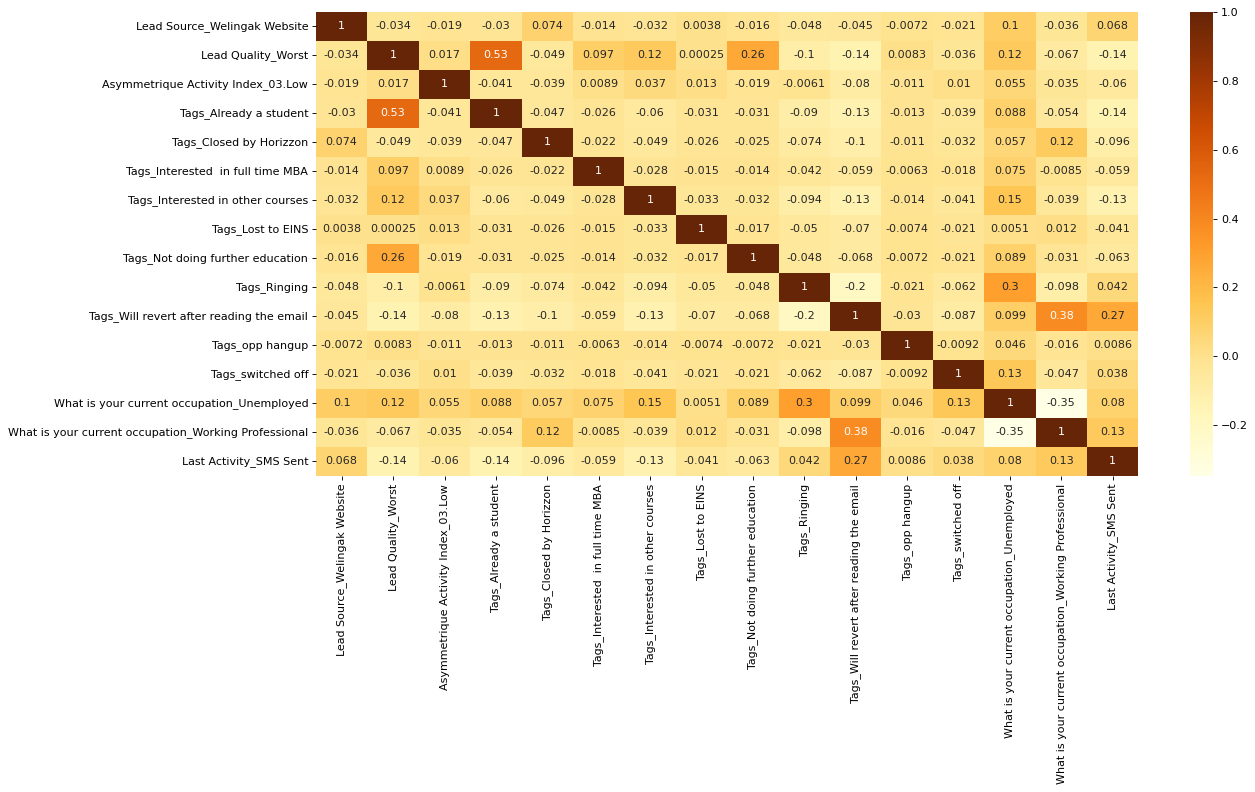

In [146]:
plt.figure(figsize=(17,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlOrBr")

plt.tight_layout()
plt.show()

### Highlighting features of the latest version of the model :
 * *All the features have very low VIF values, indicating hardly any muliti-collinearity among the features. This is also evident from the correlations seen in the above heat map.*
 * *All variables have p-values < 0.05.*
 * *Overall accuracy achieved of `0.9125` is also very acceptable.*
 
#### Taking above model features into consideration we do not drop any more variables and proceed with making predictions using this version of the model

## Step 8: Calculating Other Metrics beyond Accuracy

In [148]:
TP = confusion_mat[1,1] #--> True Positive 
TN = confusion_mat[0,0] #--> True Negatives
FP = confusion_mat[0,1] #--> False Positives
FN = confusion_mat[1,0] #--> False Negatives

In [149]:
# Calculating Sensitivity for our logistic regression model
TP / float(TP+FN)

0.8195057369814651

In [150]:
# Calculating Specificity
TN / float(TN+FP)

0.9689507494646681

In [151]:
# Calculating false postive rate (FPR) - model predicting churn when customer actually does not churn
print(FP/ float(TN+FP))

0.031049250535331904


In [152]:
# Positive predictive value 
print (TP / float(TP+FP))

0.941206284845413


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8984859766691486


## Step 9: Plotting the ROC (Receiver Operator Characteristic) Curve

Drawing the ROC curve to check for :

- The tradeoff between Sensitivity and Specificity (any increase in Sensitivity will typically be accompanied by a decrease in Specificity).
- How close is the curve to the left-hand border and then the top border of the ROC space --> indicates higher accuracy of the test.
- How close is the curve to the 45-degree diagonal of the ROC space --> denotes lesser accuracy of the test.

In [154]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

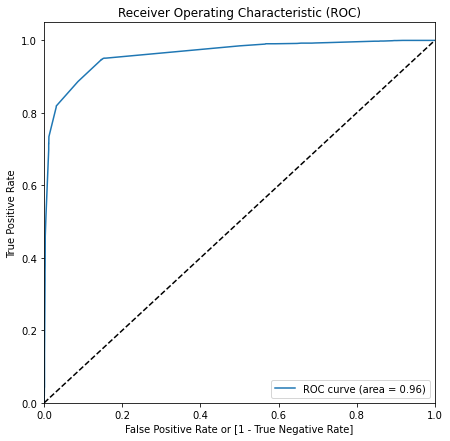

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.show()

### Calculating the area under the curve(GINI)

In [157]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [158]:
auc = auc_val(fpr,tpr)
auc

0.9623860234430959

## Step 10: Finding Optimal Cutoff Point

In [159]:
# Finding the optimal cutoff probability where we get balanced Sensitivity and specificity

In [160]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0


In [161]:
# Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.884039  0.951015  0.843415
0.2   0.2  0.888204  0.947926  0.851981
0.3   0.3  0.889037  0.946161  0.854390
0.4   0.4  0.912363  0.819506  0.968683
0.5   0.5  0.912529  0.819506  0.968951
0.6   0.6  0.912363  0.819064  0.968951
0.7   0.7  0.911863  0.817299  0.969218
0.8   0.8  0.892203  0.734334  0.987955
0.9   0.9  0.885205  0.715357  0.988223


### Plotting Accuracy, Sensitivity & Specificity for various probabilities.

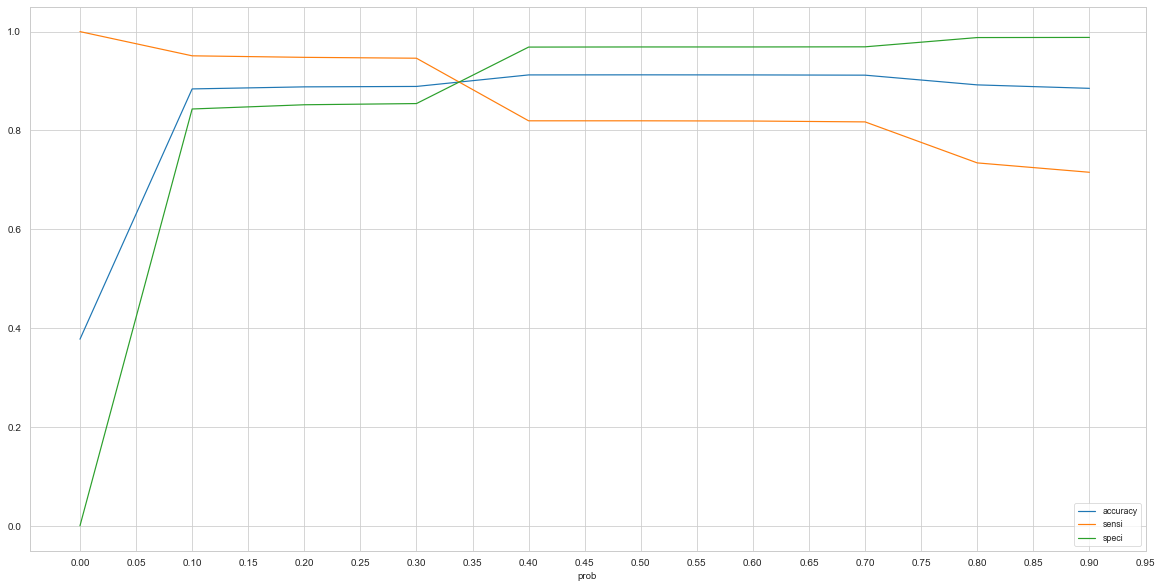

In [162]:
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(20,10))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 10)
plt.yticks(size = 10)
plt.show()

#### From curve plotted above, 0.34 is the optimum point that can be considered as the cutoff probability.

In [163]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [164]:
# Checking Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9031989336887704

In [165]:
confusion_mat1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_mat1

array([[3411,  325],
       [ 256, 2010]])

In [166]:
TP = confusion_mat1[1,1] #--> True Positive 
TN = confusion_mat1[0,0] #--> True Negatives
FP = confusion_mat1[0,1] #--> False Positives
FN = confusion_mat1[1,0] #--> False Negatives

In [167]:
# Calculating Sensitivity for our logistic regression model
TP / float(TP+FN)

0.8870255957634599

In [168]:
# Calculating Specificity
TN / float(TN+FP)

0.9130085653104925

In [169]:
# Calculating false postive rate (FPR) - model predicting churn when customer actually does not churn
print(FP/ float(TN+FP))

0.0869914346895075


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

0.860813704496788


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9301881647122989


## Step 11: Precision and Recall

##### Precision
TP / TP + FP

In [172]:
precision = confusion_mat1[1,1]/(confusion_mat1[0,1]+confusion_mat1[1,1])
precision

0.860813704496788

##### Recall
TP / TP + FN

In [173]:
recall = confusion_mat1[1,1]/(confusion_mat1[1,0]+confusion_mat1[1,1])
recall

0.8870255957634599

In [174]:
#Calculating Precision / Recall with SkLearn Utilities
from sklearn.metrics import precision_score, recall_score

In [175]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.860813704496788

In [176]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8870255957634599

### Precision and recall tradeoff

In [177]:
from sklearn.metrics import precision_recall_curve

In [178]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: final_predicted, Length: 6002, dtype: int64)

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

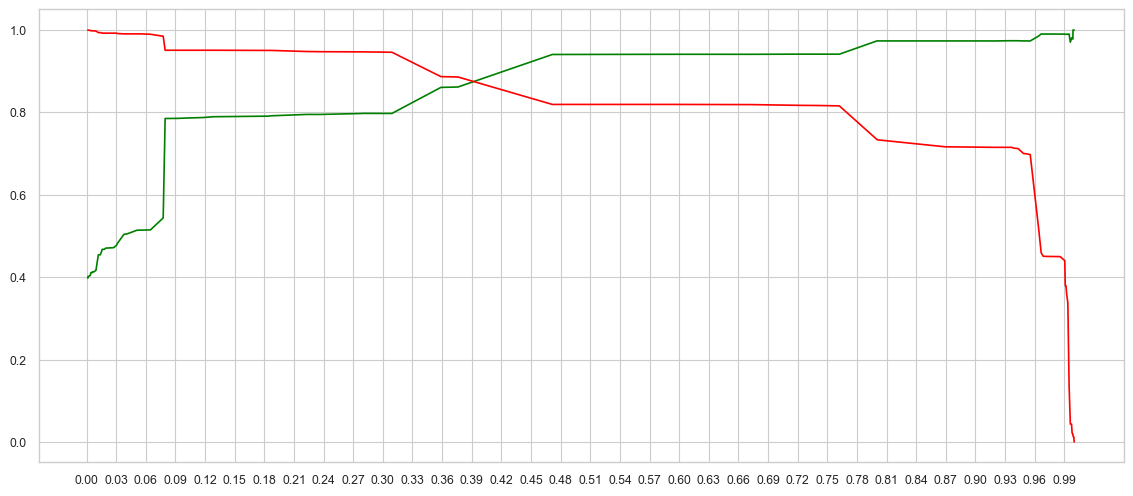

In [180]:
#Plotting the Precision-Recall Tradeoff
plt.figure(figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.03))
plt.show()

#### From the Precision-Recall Tradeoff plot above, we get optimal threshold value of close to 0.39. However, business requirement for the case is to have Lead Conversion Rate of around 80%.  
#### This requirement is already achieved with the earlier threshold value of 0.34. So we proceed with this value.

### Calculating the F1 score
##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [181]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8737231036731146

## Step 12: Making predictions on Test set

#### Transformation of the Test dataset with Scalar function

In [182]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Adding the constant & Making Predictions on Test dataset

In [191]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [192]:
# Making Predictions on Test Dataset
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

6190    0.000591
7073    0.077626
4519    0.309185
607     0.999825
440     0.077626
4247    0.077626
7431    0.008041
726     0.376039
7300    0.008041
4046    0.077626
dtype: float64

In [197]:
# Converting y_pred to a dataframe from series
y_pred_1 = pd.DataFrame(y_test_pred)

In [198]:
y_pred_1.head()

,0
6190,0.000591
7073,0.077626
4519,0.309185
607,0.999825
440,0.077626


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# Putting CustID to Index
y_test_df['LeadID'] = y_test_df.index

In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_pred_1 and Print head
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [208]:
# Renaming the column '0' to Conversion Probabilities
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [210]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [211]:
# Rearranging the dataframe columns
y_pred_final = y_pred_final.iloc[:,[1,0,2]]

In [212]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,6190,0,0.000591
1,7073,0,0.077626
2,4519,0,0.309185
3,607,1,0.999825
4,440,0,0.077626


In [213]:
y_pred_final.shape

(2573, 3)

#### Using the probability threshold value 0f 0.34 on Test dataset to predict if a lead will convert

In [214]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [215]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [216]:
# Checking the overall Accuracy
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9055577147298873

In [217]:
confusion_mat_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_mat_test)

[[1445  132]
 [ 111  885]]


### Plotting Confusion Matrix

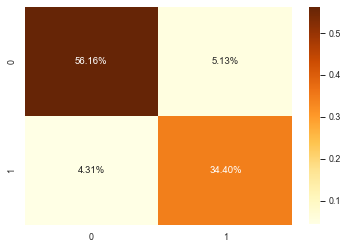

In [230]:
#Plotting Confusion Matrix quadrant data percentages
sns.heatmap(confusion_mat_test/np.sum(confusion_mat_test), annot=True,fmt='.2%', cmap='YlOrBr')
plt.show()

In [231]:
TP = confusion_mat_test[1,1] #--> True Positive 
TN = confusion_mat_test[0,0] #--> True Negatives
FP = confusion_mat_test[0,1] #--> False Positives
FN = confusion_mat_test[1,0] #--> False Negatives

#### Looking at metrics beyond Accuracy on the Test dataset

##### Sensitivity
TP / TP + FN

In [232]:
# Calculating Sensitivity for our logistic regression model
TP / float(TP+FN)

0.8885542168674698

In [233]:
# Calculating Specificity
TN / float(TN+FP)

0.9162967660114141

In [234]:
# Calculating false postive rate (FPR) - model predicting churn when customer actually does not churn
print(FP/ float(TN+FP))

0.08370323398858592


In [235]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8702064896755162


In [236]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9286632390745502


In [237]:
# Calculating Precision
precision = confusion_mat_test[1,1]/(confusion_mat_test[0,1]+confusion_mat_test[1,1])
precision

0.8702064896755162

In [238]:
# Calculating Recall
recall = confusion_mat_test[1,1]/(confusion_mat_test[1,0]+confusion_mat_test[1,1])
recall

0.8885542168674698

In [240]:
##### Calculating F1 --> F1 = 2×(Precision*Recall)/(Precision+Recall)
F1 = 2*(precision*recall)/(precision+recall)
F1

0.879284649776453

In [241]:
# Generating Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1577
           1       0.87      0.89      0.88       996

    accuracy                           0.91      2573
   macro avg       0.90      0.90      0.90      2573
weighted avg       0.91      0.91      0.91      2573



In [243]:
# Generating Cross Validation Score
from sklearn.model_selection import cross_val_score

In [261]:
# Calculating Cross Validation Score to check LR model performance and avoid 
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()

print(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.84364061 0.87762238 0.89731622 0.90898483 0.91608392 0.92307692
 0.92424242 0.92532089 0.93356643 0.9369895 ]
Accuracy: 0.909 (0.027)


### Plotting ROC Curve for Test Dataset

In [254]:
# Defining function to draw ROC (Receiver Operating Characteristic) Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Test Dataset')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [252]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

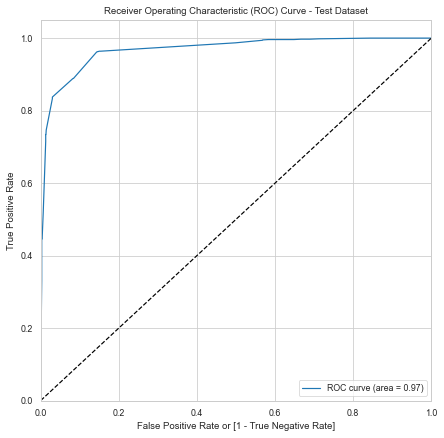

In [255]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)
plt.show()

### Calculating Area Under the Curve (GINI)

In [262]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [263]:
auc = auc_val(fpr,tpr)
auc

0.9678947241088641

##### While there is no specific threshold for what is considered a good AUC score (and it typically varies by industry) - higher the AUC score, the better the model is able to classify observations into classes.

##### Laying down some thresholds for evaluation and understanding purposes (Source: Hosmer and Lemeshow in ***Applied Logistic Regression***):
- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9 = Excellent discrimination
- Greater than 0.9 = Outstanding discrimination

##### With a AUC value achieved of `0.967`, the model is found to be discriminating well on the Test dataset

## Step 13: Calculating Lead score for the Entire dataset

#### Lead Score = 100 * ConversionProbability

#### Lead Score calculated for all leads from the original dataset (Train + Test)

In [264]:
# Selecting Test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [265]:
# Selecting Train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [266]:
# Retaining only the required columns in Train dataset while dropping unnecessary columns
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


### Concatenating Train and Test datasets with the Conversion Probabilities

In [267]:
# Concatenating the Train and Test dataframes along the rows with the append() function (as columns labels are same for both dataframes)
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


In [268]:
# Inspecting the shape of the final dataframe and if both Test and Train dataframes are appended correctly
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [269]:
# Checking if the LeadIDs are unique for each lead in the final dataframe formed
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [270]:
# Calculating the Lead Score values
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,8529,0,0.064688,0,6
1,7331,0,0.009566,0,1
2,7688,1,0.762190,1,76
3,92,0,0.077626,0,8
4,4908,0,0.077626,0,8


In [272]:
# Inspecing the Max LeadID
lead_full_pred.LeadID.max()

9239

In [273]:
# Turning the LeadID column into index - this will later allow to join it with the original_leads dataframe based on index values
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.031109,0,3
1,0,0.009566,0,1
2,1,0.801308,1,80
3,0,0.009566,0,1
4,1,0.955452,1,96


In [275]:
# Slicing 'Lead Number' column from original_leads dataframe
original_leads_ln = original_leads_df[['Lead Number']]
original_leads_ln.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Based on index values concatenating the 2 dataframes.
#### With this step the Lead Score is associated to the Lead Number of each Lead row which helps in quick identification of each lead.

In [278]:
# Concatenation of the 2 dataframes based on index values
leads_with_scores = pd.concat([original_leads_ln, lead_full_pred], axis=1)
leads_with_scores.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.031109,0,3
1,660728,0,0.009566,0,1
2,660727,1,0.801308,1,80
3,660719,0,0.009566,0,1
4,660681,1,0.955452,1,96


In [280]:
# Inspecting the shape of final concatenated dataframe
leads_with_scores.shape

(8575, 5)

In [281]:
# Checking of the final dataframe for any Null values

total = pd.DataFrame(leads_with_scores.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_scores.isnull().sum()/leads_with_scores.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Number,0,0.0
Converted,0,0.0
Conversion_Prob,0,0.0
final_predicted,0,0.0
Lead_Score,0,0.0


## Step 14: Determining Relative Feature Importance of Model Variables

#### Selecting coefficients of the selected features from final model excluding the intercept

In [282]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            3.61
Lead Quality_Worst                                     -3.18
Asymmetrique Activity Index_03.Low                     -2.34
Tags_Already a student                                 -3.45
Tags_Closed by Horizzon                                 5.44
Tags_Interested  in full time MBA                      -2.66
Tags_Interested in other courses                       -2.63
Tags_Lost to EINS                                       6.71
Tags_Not doing further education                       -3.35
Tags_Ringing                                           -3.84
Tags_Will revert after reading the email                3.87
Tags_opp hangup                                        -3.08
Tags_switched off                                      -4.73
What is your current occupation_Unemployed              1.67
What is your current occupation_Working Professional    1.89
Last Activity_SMS Sent                                  1.97
dtype: float64

#### Getting relative coeffient values for all features with respect to the feature with highest coefficient

In [283]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            53.85
Lead Quality_Worst                                     -47.38
Asymmetrique Activity Index_03.Low                     -34.87
Tags_Already a student                                 -51.40
Tags_Closed by Horizzon                                 81.12
Tags_Interested  in full time MBA                      -39.59
Tags_Interested in other courses                       -39.26
Tags_Lost to EINS                                      100.00
Tags_Not doing further education                       -49.88
Tags_Ringing                                           -57.17
Tags_Will revert after reading the email                57.67
Tags_opp hangup                                        -45.88
Tags_switched off                                      -70.45
What is your current occupation_Unemployed              24.90
What is your current occupation_Working Professional    28.23
Last Activity_SMS Sent                                  29.34
dtype: f

#### Sorting feature variables based on their relative coefficient values

In [284]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            12
Lead Quality_Worst                                       9
Asymmetrique Activity Index_03.Low                       3
Tags_Already a student                                   8
Tags_Closed by Horizzon                                  1
Tags_Interested  in full time MBA                       11
Tags_Interested in other courses                         5
Tags_Lost to EINS                                        6
Tags_Not doing further education                         2
Tags_Ringing                                            13
Tags_Will revert after reading the email                14
Tags_opp hangup                                         15
Tags_switched off                                        0
What is your current occupation_Unemployed              10
What is your current occupation_Working Professional     4
Last Activity_SMS Sent                                   7
dtype: int64

#### Relative Feature Importance Plot (showing feature variables based on their relative coefficient values)

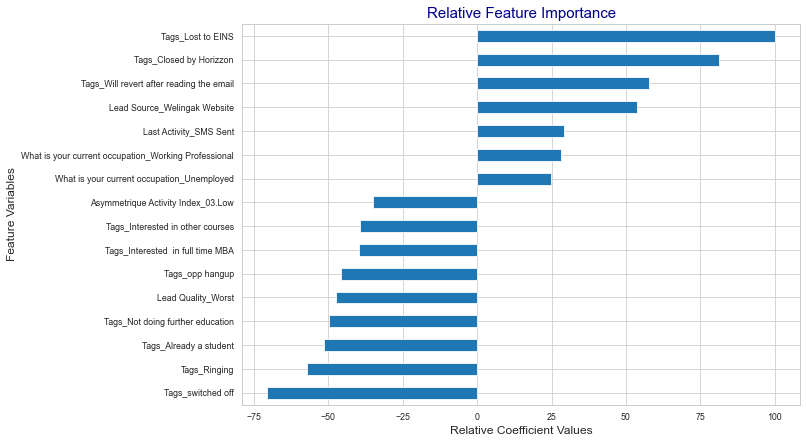

In [306]:
plt.figure(figsize=[10,7])
plt.title('Relative Feature Importance',fontdict={'fontsize' : 15,'color' : 'darkblue'})
feature_importance[sorted_idx].plot.barh()
plt.ylabel('Feature Variables',fontdict={'fontsize' : 12})
plt.xlabel('Relative Coefficient Values',fontdict={'fontsize' : 12})
plt.show()

### Listing `Top 3 features` which contribute most towards the probability of a lead getting converted

In [305]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,81.12
10,Tags_Will revert after reading the email,57.67


## Step 15: Summing It Up

### Post running multiple models, a model with following characteristics was finally chosen :
 * *All the features have very low VIF values, indicating hardly any multi-collinearity among the features. This is also evident from the final correlations heatmap that is plotted.*
 * *All variables have p-values < 0.05.*
 * *Overall accuracy achieved is `0.9055` at a probability threshold of 0.34 which is also very acceptable.*
 
#### Using this model, the dependent variable value was predicted as per the threshold value of Conversion probability (0.34):
* Dataset : `Test`
* Accuracy : `0.906`
* Sensitivity : `0.889`
* Specificity : `0.916`
* False Postive Rate : `0.084`
* Positive Predictive Value : `0.861`
* Negative Predictive value : `0.930`
* Precision : `0.870`
* Recall : `0.889`
* F1 value : `0.879`
* Cross Validation Score (Accuracy) : `0.909`
* AUC : `0.968`

### Finally based on model, some features are identified which contribute most to success of Lead conversion and are suggested to be considered by X Education. 

#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|----------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Lead Source_Welingak Website|
|Last Activity_SMS Sent|
|What is your current occupation_Working Professional|
|What is your current occupation_Unemployed|

#### On the other hand, the conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_switched off|
|Tags_Ringing|
|Tags_Already a student|
|Tags_Not doing further education|
|Lead Quality_Worst|
|Tags_opp hangup|
|Tags_Interested  in full time MBA|
|Tags_Interested in other courses|
|Asymmetrique Activity Index_03.Low|

***Notes :***
* *Depending on business requirement, probability threshold value can increased or decreased which will thereby decrease or increase the Sensitivity and increase or decrease the Specificity of the model.*
* *High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.*